# 🎧 HitSense EDA Notebook
This notebook performs exploratory data analysis on a music dataset to prepare features for predicting hit potential.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")


In [2]:
# Ensure data directory exists
os.makedirs('data', exist_ok=True)

# Load demo data
sample_data = {
    'danceability': [0.5, 0.8, 0.6],
    'energy': [0.7, 0.6, 0.8],
    'tempo': [120, 130, 110],
    'valence': [0.4, 0.6, 0.3],
    'acousticness': [0.1, 0.05, 0.2],
    'popularity': [50, 80, 30]
}
df = pd.DataFrame(sample_data)
df.to_csv('data/hitsense_raw.csv', index=False)
df.head()

,danceability,energy,tempo,valence,acousticness,popularity
0,0.5,0.7,120,0.4,0.10,50
1,0.8,0.6,130,0.6,0.05,80
2,0.6,0.8,110,0.3,0.20,30


In [3]:
print("Data Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())
print("\nSummary Stats:")
print(df.describe())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   danceability  3 non-null      float64
 1   energy        3 non-null      float64
 2   tempo         3 non-null      int64  
 3   valence       3 non-null      float64
 4   acousticness  3 non-null      float64
 5   popularity    3 non-null      int64  
dtypes: float64(4), int64(2)
memory usage: 272.0 bytes

Missing Values:
danceability    0
energy          0
tempo           0
valence         0
acousticness    0
popularity      0
dtype: int64

Summary Stats:
       danceability  energy  tempo   valence  acousticness  popularity
count      3.000000    3.00    3.0  3.000000      3.000000    3.000000
mean       0.633333    0.70  120.0  0.433333      0.116667   53.333333
std        0.152753    0.10   10.0  0.152753      0.076376   25.166115
min        0.500000    0.60  110.0  0.300000      0.

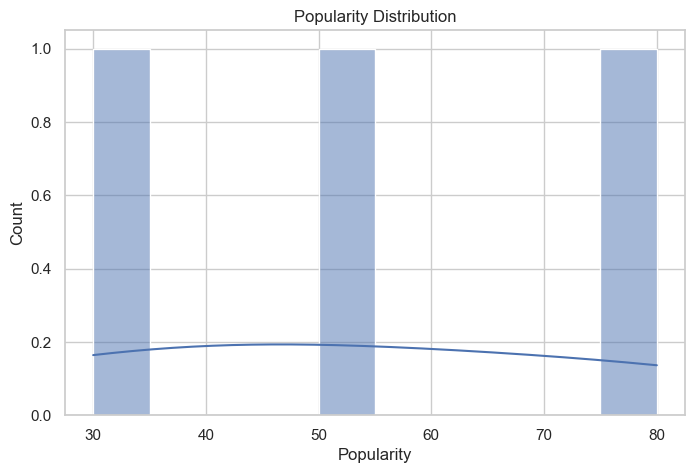

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(df['popularity'], kde=True, bins=10)
plt.title("Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

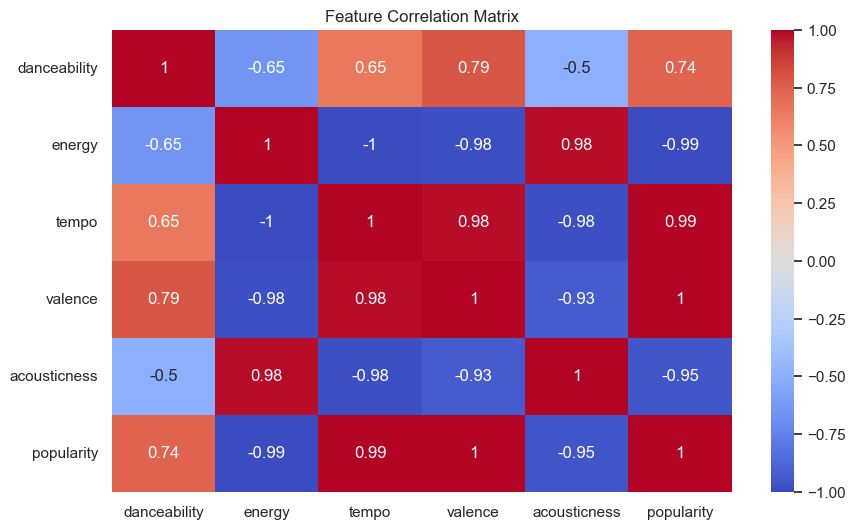

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [6]:
df['hit_score'] = df['popularity'] / 100
df['vibe_score'] = df['danceability'] * df['valence']
df.head()

,danceability,energy,tempo,valence,acousticness,popularity,hit_score,vibe_score
0,0.5,0.7,120,0.4,0.10,50,0.5,0.20
1,0.8,0.6,130,0.6,0.05,80,0.8,0.48
2,0.6,0.8,110,0.3,0.20,30,0.3,0.18


In [7]:
df.to_csv('data/hitsense_cleaned.csv', index=False)
print("Cleaned data saved to 'data/hitsense_cleaned.csv'")

Cleaned data saved to 'data/hitsense_cleaned.csv'
